In [1]:
import markdown
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

# IE 360 Statistical Forecasting and Time Series - Homework 1   
### Fatih Mehmet Yılmaz  / 2017402066

* In this homework, I investigated six different time series from Turkey Central Bank and I tried to show my data manipulation skills on a selection of time series data. The data I used is provided by www.https://evds2.tcmb.gov.tr/

* I downloaded the data series for 5 years (2016 - 2021) on the monthly basis and manipulated it into a more desired form.

* For each time series data, I used Pandas dataframe for manipulation, and matplotlib and seaborn for the visualization.

##### Central Bank Data Study

* I used six different measure to investigate: USD(buying), Electricity Consumption in Turkey, Production in Turkey, House Sales, Residential Property Price Index, and Consumer Price Index. I tried to understand the USD rates in Turkey for 5 years. 

* Then, I tried to analyze the Electricity Consumption and the Production. Afterwards, I wondered if they are related or not. 

* With House Sales and Residential Property Price Index data, I studied individually and tried to understand the nature of them. When I thought of these two measures together, I had expected but still surprising results.

* I finally checked if there is a unexpected relation between Residential Property Price Index and Consumer Price Index.

In [2]:
df = pd.read_excel("Data.xlsx") # Importing the data and converting it into dataframe
df2 = df.copy() # To keep the data as it is in the original form, I copied it into a copy dataframe called df2

In [3]:
df2 = df2.drop(columns = ['TP MT210AGS TRY MT01', 'TP MT210AGS TRY MT02', 'TP MT210AGS TRY MT03', 'TP MT210AGS TRY MT04', 'TP MT210AGS TRY MT05', 'TP DK EUR A YTL', 'TP DK EUR S YTL', 'TP DK USD S YTL', 'TP KTF17', 'TP SGEGI K1']) 
# I do not need these columns and I give up using the interest rate, tourism and Euro rates, 
# and they have similar meanings so I dropped them unnecessary columns.
df2['Tarih'] = pd.to_datetime(df2['Tarih'], format = '%Y-%m-%d') # Format change in Date
df2.head()

,Tarih,TP SANAYREV4 Y1,TP ELEKTUKETIM TKT1,TP AKONUTSAT1 TOPLAM,TP DK USD A YTL,TP FG J0,TP HKFE01
0,2016-01-01,91.328330,765344.606452,84556,3.006950,274.44,85.7
1,2016-02-01,95.806146,729419.478621,101703,2.940662,274.38,86.6
2,2016-03-01,106.410088,714857.482581,117205,2.891739,274.27,87.5
3,2016-04-01,102.694391,710060.789333,106348,2.834738,276.42,88.6
4,2016-05-01,107.109929,706461.367097,114800,2.926595,278.02,89.7


In [4]:
df2.index = df2.index + 1 # For myself, I indexed the data starting from the '1'
df2.head() # I checked the change I did

,Tarih,TP SANAYREV4 Y1,TP ELEKTUKETIM TKT1,TP AKONUTSAT1 TOPLAM,TP DK USD A YTL,TP FG J0,TP HKFE01
1,2016-01-01,91.328330,765344.606452,84556,3.006950,274.44,85.7
2,2016-02-01,95.806146,729419.478621,101703,2.940662,274.38,86.6
3,2016-03-01,106.410088,714857.482581,117205,2.891739,274.27,87.5
4,2016-04-01,102.694391,710060.789333,106348,2.834738,276.42,88.6
5,2016-05-01,107.109929,706461.367097,114800,2.926595,278.02,89.7


In [5]:
df2 = df2.rename(columns ={'Tarih' : 'Date', 'TP SANAYREV4 Y1': 'Industrial Production', 
                     'TP ELEKTUKETIM TKT1': 'Electricity Consumption', 
                     'TP DK USD A YTL': 'USD_buying', 'TP AKONUTSAT1 TOPLAM': 'HouseSales', 
                     'TP FG J0': 'Consumer Price Index', 'TP HKFE01' : 'Residential Property Price Index'}) 
# Change the column names as I will use
df2.head()

,Date,Industrial Production,Electricity Consumption,HouseSales,USD_buying,Consumer Price Index,Residential Property Price Index
1,2016-01-01,91.328330,765344.606452,84556,3.006950,274.44,85.7
2,2016-02-01,95.806146,729419.478621,101703,2.940662,274.38,86.6
3,2016-03-01,106.410088,714857.482581,117205,2.891739,274.27,87.5
4,2016-04-01,102.694391,710060.789333,106348,2.834738,276.42,88.6
5,2016-05-01,107.109929,706461.367097,114800,2.926595,278.02,89.7


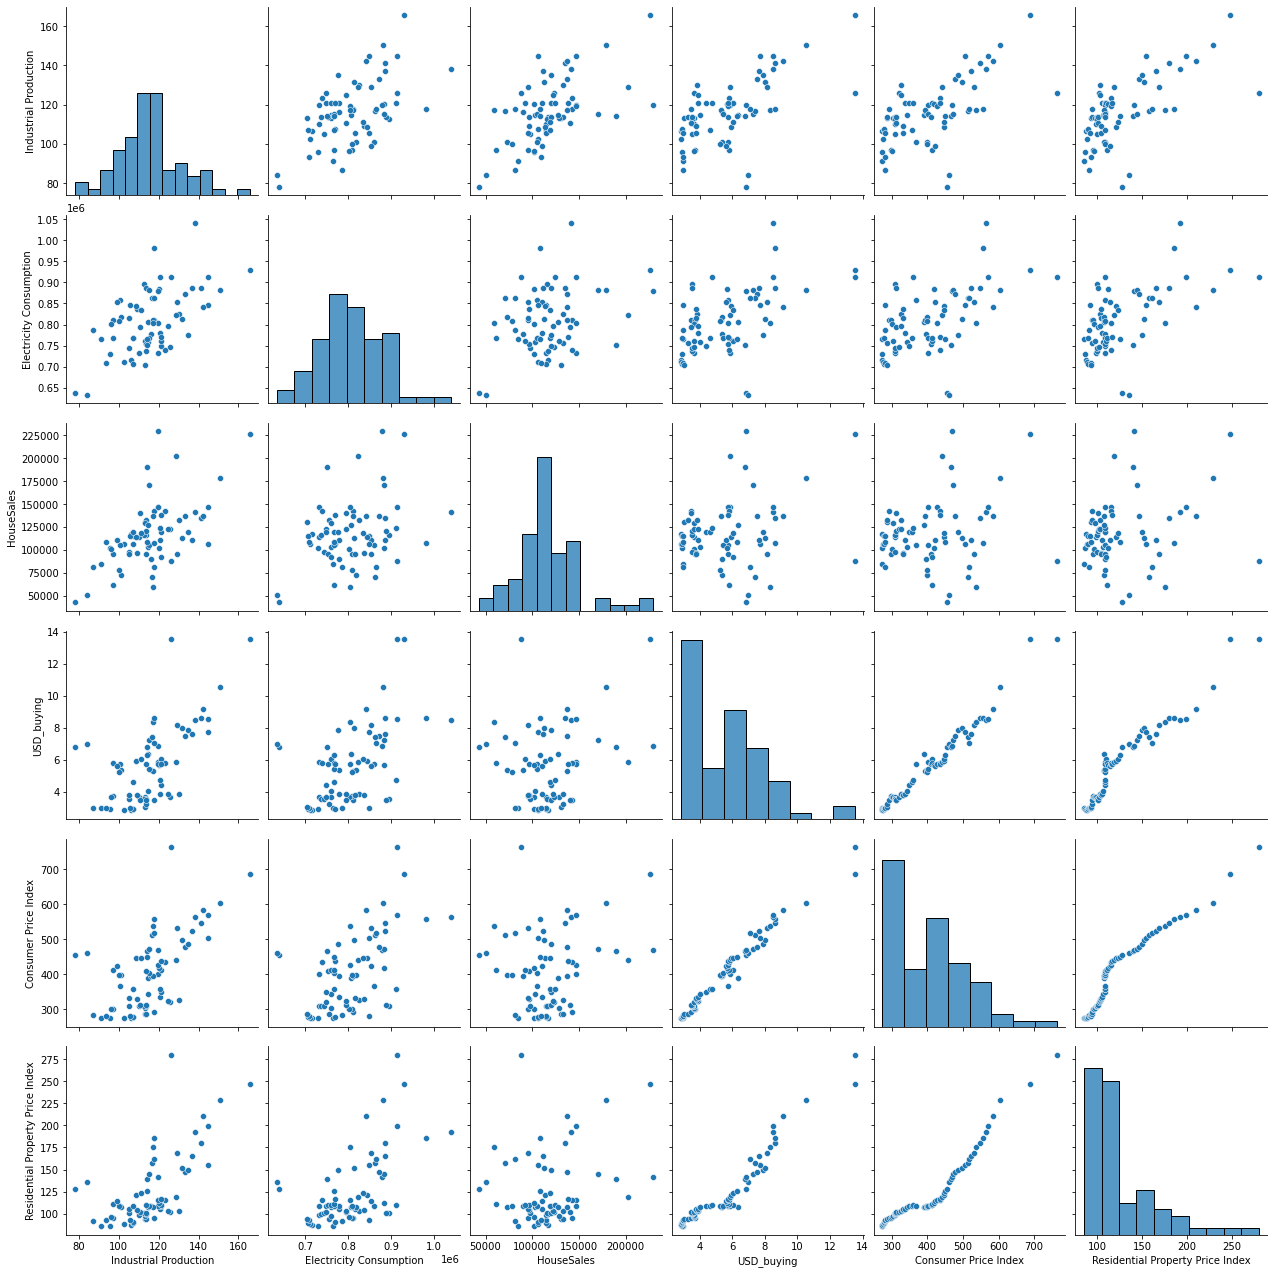

In [6]:
sns.pairplot(data=df2, height=3) # histograms and scatter plots for all measures to understand the relations

* Firstly, I used the seaborn and pairplot function to see the histograms and scatter plot. I mainly focus on the histograms to understand the distribution of the values over the time, but it is good to see the scatter plotted data. This function helps me to look at the data at one glance. 

* I looked at the electricity consumption and the production in Turkey in order to see the relationship between them. I wondered whether they show similar behaviours or not. They follow a line at a glance even though they have a variance; therefore, we can say that they are related and follow the same behaviours and paths.

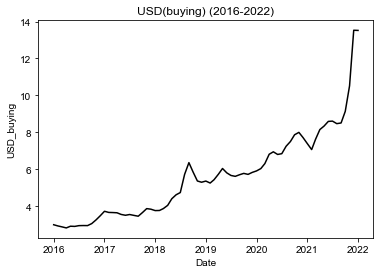

In [7]:
sns.lineplot(data=df2, x="Date", y="USD_buying", color = 'black').set(title='USD(buying) (2016-2022)')
sns.set(rc={'figure.figsize':(8,6)})

* As it can be seen from the line of the data, there is an increasing, upward trend for USD rate against Turkish Liras from 2016 to at the end of 2021. At the second half of the 2016, the effects of political instability showed its effects. In 2018, an election took place and after the new cabinet and new policies, a spike occurred. In 2021, a drastic increase occurred due to some political and economical policies taking place in Turkey. 

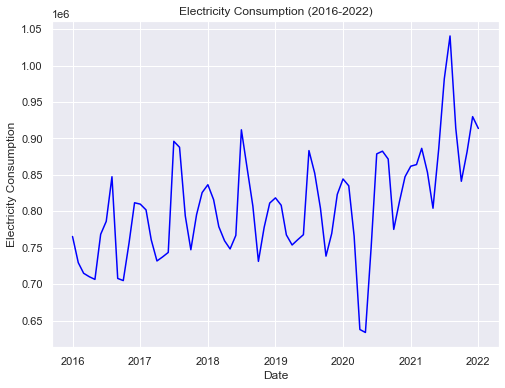

In [8]:
sns.lineplot(data=df2, x="Date", y="Electricity Consumption", color = 'blue').set(title='Electricity Consumption (2016-2022)')
sns.set(rc={'figure.figsize':(8,6)})

* This plot showed that the effect of the COVID-19 pandemics effect the electricity consumption dramatically as expected. However, after the effects of the pandemics started to be removed, there is a great increase in the electricity consumption. In spring and fall months, the consumption decreases; on the other hand, in winter and summer times, the consumption increases. Even though we analyzed this data in class as well, I wondered the relationship between the electricity consumption and other measures so it is good to look at the data in this form.  

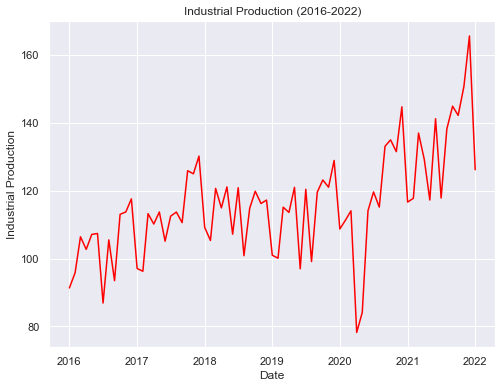

In [9]:
sns.lineplot(data=df2, x="Date", y="Industrial Production", color = 'red').set(title='Industrial Production (2016-2022)')
sns.set(rc={'figure.figsize':(8,6)})

I used these two different time series data, electricity consumption and the production. It showed that these two measure are related to each other. To give an example, in COVID term, the production and the manufacturing industry got hurt which is parallel to the decrease in electricity consumption. 

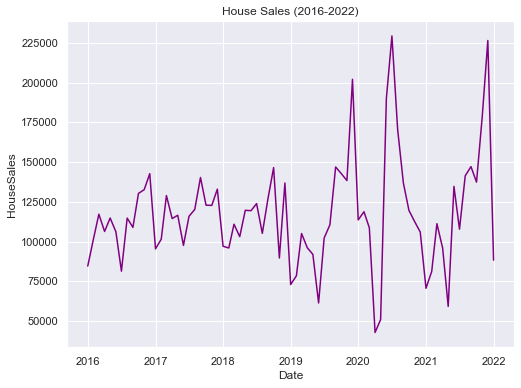

In [10]:
sns.lineplot(data=df2, x="Date", y="HouseSales", color = 'purple').set(title='House Sales (2016-2022)')
sns.set(rc={'figure.figsize':(8,6)})

* Looking at the data, we can say that some major events and incentives have an effect on the sales. For instance, the worst part of the COVID-19 period decreased the sales; however, with the government incentives and financial instruments, the decrease in Mortgage loan interest rates, helped the sales increase just after the Covid-19 period. Again, at the end of the 2021, the fluctuations in the exchange rates led the people to buy more houses and drawed the attention of the foreign real estate investors. Still, the fluctuations in the data demonstrates that the housing sales follow and need the incentives.      

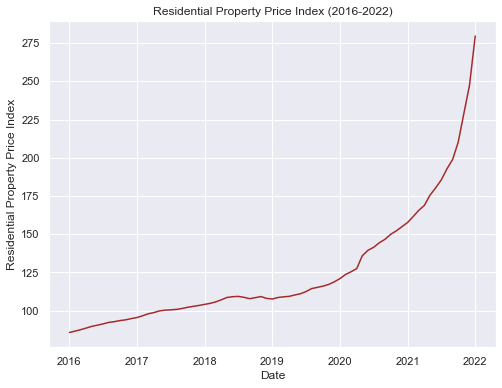

In [11]:
sns.lineplot(data=df2, x="Date", y="Residential Property Price Index", color = 'brown').set(title='Residential Property Price Index (2016-2022)')
sns.set(rc={'figure.figsize':(8,6)})

* I looked at this data because whether there is a relationship between the house sales and the residential price index. However, the residential price index has an upward trend as expected. This occurs because there is inflation and this seems reasonable. The data does not have a linearly increasing behaviour. Therefore, the increase in the last 2 years can only be explained by incentives and the exchange rates. The incentives increased the demand and the increase in the exchange rates have an effect on the prices.  

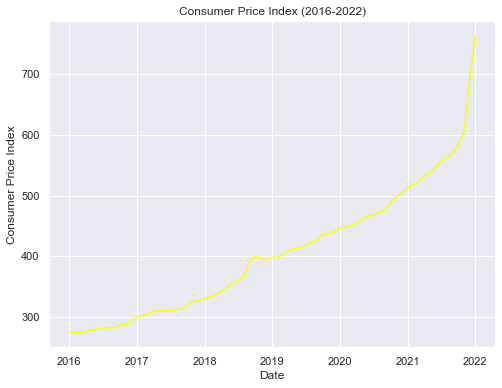

In [12]:
sns.lineplot(data=df2, x="Date", y="Consumer Price Index", color = 'yellow').set(title='Consumer Price Index (2016-2022)')
sns.set(rc={'figure.figsize':(8,6)})

* As expected, the upward trend occured in this index. Housing is not significantly different than the other goods in Turkey.

#### Google Trends Data Study

* In the Google Trends(http://trends.google.com/) data section, I inspected 3 keywords that might relevant to the measures I consider in the earlier parts. These keywords are 'Konut Kredisi', 'Enflasyon' and 'Kriz'. I tried to understand the relationships between the mortgage loans and the house sales, the inflation and the consumer price index and finally, the crisis and the exchange rates. 

In [13]:
df_trend = pd.read_csv("KonutKredisi.csv", header=0) # Importing the data and converting it into dataframe 

In [14]:
df_trend = pd.DataFrame(df_trend["Kategori: Tüm kategoriler"].values, index = df_trend.index)
df_trend = pd.DataFrame(df_trend[1::].values, index = df_trend.index[1::])
df_trend.columns = ["Mortgage_Loan_Search_Volume"]
df_trend.index.name = "Date"
df_trend['Mortgage_Loan_Search_Volume'] = df_trend['Mortgage_Loan_Search_Volume'].astype(int)
df_trend = df_trend.reset_index()
df_trend['Date'] = pd.to_datetime(df_trend['Date'], format = '%Y-%m-%d') # Format change in Date
df_trend.head()

,Date,Mortgage_Loan_Search_Volume
0,2016-01-01,7
1,2016-02-01,9
2,2016-03-01,8
3,2016-04-01,10
4,2016-05-01,9


Text(0.5, 1.0, 'House Sales')

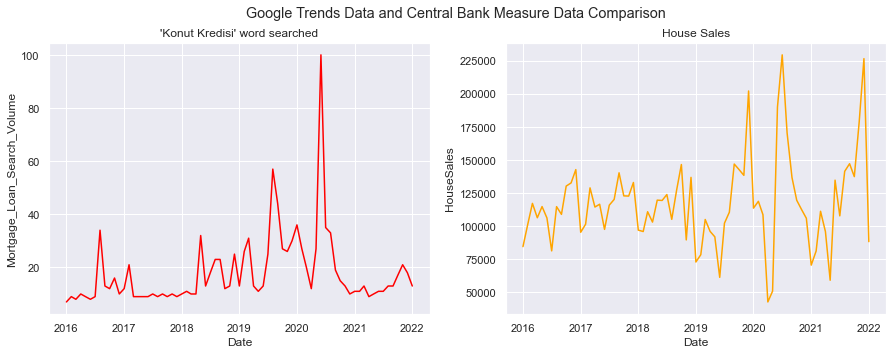

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle(" Google Trends Data and Central Bank Measure Data Comparison")
sns.lineplot(data= df_trend, ax=axes[0], x = 'Date', y = 'Mortgage_Loan_Search_Volume', color= 'red')
sns.lineplot(data = df2, ax = axes[1], x = 'Date', y = 'HouseSales', color='orange')
axes[0].set_title("'Konut Kredisi' word searched")
axes[1].set_title("House Sales")

* In this comparison, it is clear that one of the peaks in the house sales resulted from the mortgage loan incentive given. Whenever people tend to get mortgage loans, there is an increase in the house sales. However, the house sales are not only related to the mortgages. There are some times when the sales increased but the mortgage loan trend stayed the same.    

In [16]:
df3 = pd.read_csv("enflasyon.csv", header=0) # Importing the data and converting it into dataframe

In [17]:
df3 = pd.DataFrame(df3["Kategori: Tüm kategoriler"].values, index = df3.index)
df3 = pd.DataFrame(df3[1::].values, index = df3.index[1::])
df3.columns = ["Inflation_Search_Volume"]
df3.index.name = "Date"
df3['Inflation_Search_Volume'] = df3['Inflation_Search_Volume'].astype(int)
df3 = df3.reset_index()
df3['Date'] = pd.to_datetime(df3['Date'], format = '%Y-%m-%d') # Format change in Date
df3.head()

,Date,Inflation_Search_Volume
0,2016-01-01,20
1,2016-02-01,8
2,2016-03-01,7
3,2016-04-01,7
4,2016-05-01,7


Text(0.5, 1.0, 'Consumer Price Index')

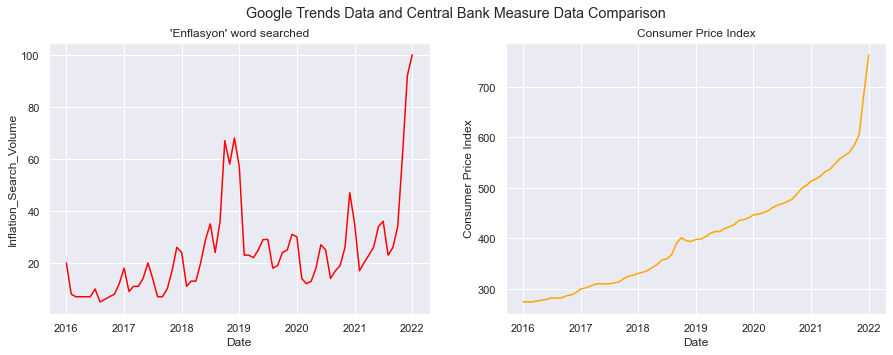

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle(" Google Trends Data and Central Bank Measure Data Comparison")
sns.lineplot(data= df3, ax=axes[0], x = 'Date', y = 'Inflation_Search_Volume', color= 'red')
sns.lineplot(data = df2, ax = axes[1], x = 'Date', y = 'Consumer Price Index', color='orange')
axes[0].set_title("'Enflasyon' word searched")
axes[1].set_title("Consumer Price Index")

* Inflation is a similar term to the CPI. The increase rate in the index motivates people to search for the inflation rate. Especially, in the last year 2021, a high rate of the search occurred as we can see the sharp upright trend in the consumer price index. Also, a fast increase in the index shows itself in the search of the inflation in Turkey.  

In [19]:
df4 = pd.read_csv("kriz.csv", header=0) # Importing the data and converting it into dataframe

In [20]:
df4 = pd.DataFrame(df4["Kategori: Tüm kategoriler"].values, index = df4.index)
df4 = pd.DataFrame(df4[1::].values, index = df4.index[1::])
df4.columns = ["Crisis_Search_Volume"]
df4.index.name = "Date"
df4['Crisis_Search_Volume'] = df4['Crisis_Search_Volume'].astype(int)
df4 = df4.reset_index()
df4['Date'] = pd.to_datetime(df4['Date'], format = '%Y-%m-%d') # Format change in Date
df4.head()

,Date,Crisis_Search_Volume
0,2016-01-01,17
1,2016-02-01,17
2,2016-03-01,22
3,2016-04-01,21
4,2016-05-01,20


Text(0.5, 1.0, 'USD(buying)')

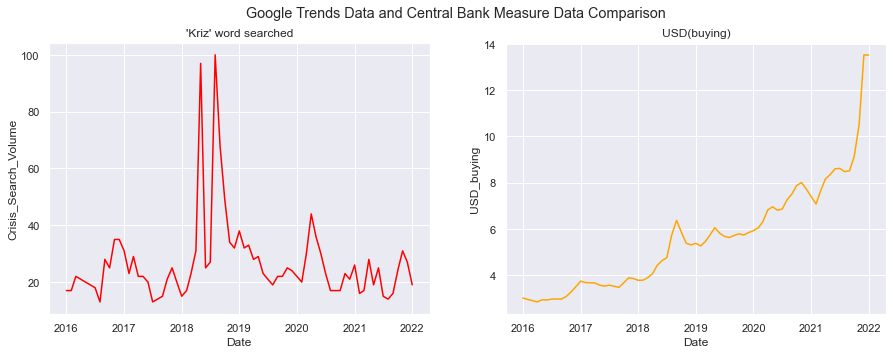

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle(" Google Trends Data and Central Bank Measure Data Comparison")
sns.lineplot(data= df4, ax=axes[0], x = 'Date', y = 'Crisis_Search_Volume', color= 'red')
sns.lineplot(data = df2, ax = axes[1], x = 'Date', y = 'USD_buying', color='orange')
axes[0].set_title("'Kriz' word searched")
axes[1].set_title("USD(buying)")

* From this comparison I made, I infer that the perception of the crisis might have changed over time. In 2018, the USD/TL rate increased from the '4' to '6.5'. People considered this increase a crisis. In fact, there were some political crisis as well. However, this was the first serious shock for the people. Then, a spike occurred near local elections for both measures. In 2019, there was a exchange rate shock and a local election. People described this as an economic crisis. However, the last and serious increase in USD rate did not affect people as much as it did in 2018. Then, we can say that the perception of a crisis might have changed over time.

### Conclusion

I studied 6 different measures from the Central Bank Data, and I inspected 3 keywords that can be relevant to these measures. Also, I wondered the relationship between some of these measures and I considered them together. The inferences are as such:

* The USD rate is in a upward trend. Political and macroeconomical incidents have a great effect on this increase.

* Electricity consumption has a seasonal behaviour. Without the pandemics, there is a upward trend as well.

* The production follows a seasonal path and the data shows that it is similar to the electricity consumption.

* When it is looked together, the production is relevant to the electricity consumption. However, the production is not the only factor for electricity consumption.

* The number of house sold in Turkey is affected by the incentives and global incidents. There are periods where the house sales increases and there are some other periods that shows the opposite effect.

* Residential Property Price Index has an upward trend as there is an inflation in Turkey. However, this does not affect the house sales as it seems.

* Consumer Price Index has increased over time as expected. The result here is residential property price index is similar to the CPI. Therefore, it is not significantly different than the other goods in Turkey.

* When I considered the keyword 'Konut Kredisi' and house sales, I conclude that if there are certain incentives for the mortgage loans, then, this affected the house sales and help it increase. However, when the house sales increases, it is not necessarily resulting from the mortgage loans.

* CPI and keyword 'inflation' is studied together. They are similar terms and it shows that when the steepness of the CPI increases, inflation search tendency increases. 

* USD rate and the keyword 'crisis' showed that if there is a currency shock, people tend to consider this a crisis. However, the interesting result is that while the time is going on, people tend not to call this currency crisis as a crisis as it can be seen in the last part.

I selected the measures I wondered and tried to understand the relationships. I hope that I demonstrated my skills and motivations clearly.